In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])  # Converts species names to numbers
print(df['species'].unique())  # Verify encoding

[0 1 2]


In [7]:
df.to_csv("IRIS_processed.csv", index=False)  # Save without the index

In [8]:
X = df.drop(columns=['species'])  # Features
y = df['species']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred = model.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


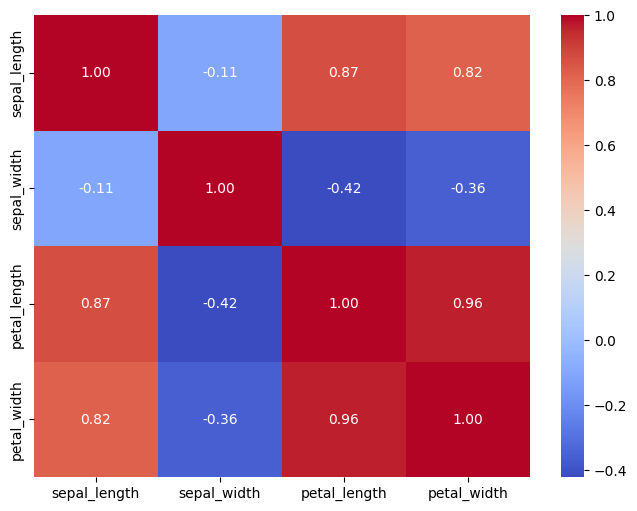

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (excluding the species column)
correlation_matrix = df.drop(columns=['species']).corr()

# Visualize correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

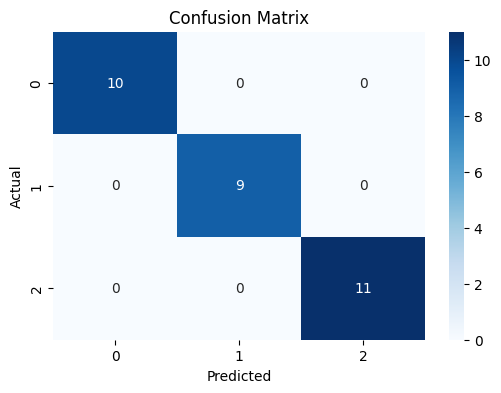

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

C:\Users\Sri Charan\AppData\Local\Temp\ipykernel_12772\2080082172.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="dark")


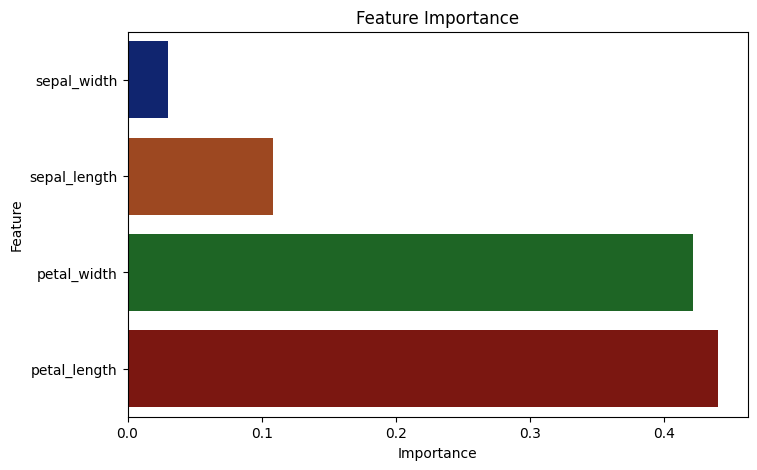

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get feature importance from the trained model
importances = model.feature_importances_
feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Sort features by importance
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="dark")

# Labels and title
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

plt.show()


In [13]:
#testing with the sample
new_sample = [[5.8, 2.7, 5.1, 1.9]]  # Example input


In [14]:
new_sample_scaled = scaler.transform(new_sample)  # Use the same scaler from training

C:\Users\Sri Charan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
import pandas as pd

# Define a new test sample
new_sample = [[5.1, 2.5, 3.0, 1.1]]

  # Example input

# Convert to DataFrame with the same feature names as the original dataset
feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
new_sample_df = pd.DataFrame(new_sample, columns=feature_names)

# Apply the same scaling transformation
new_sample_scaled = scaler.transform(new_sample_df)

# Predict the species
predicted_class = model.predict(new_sample_scaled)
predicted_species = label_encoder.inverse_transform(predicted_class)

print(f"Predicted Species: {predicted_species[0]}")

Predicted Species: Iris-versicolor
